# 라마코치_03팀_3주차_미션

Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!



🔽 딕셔너리
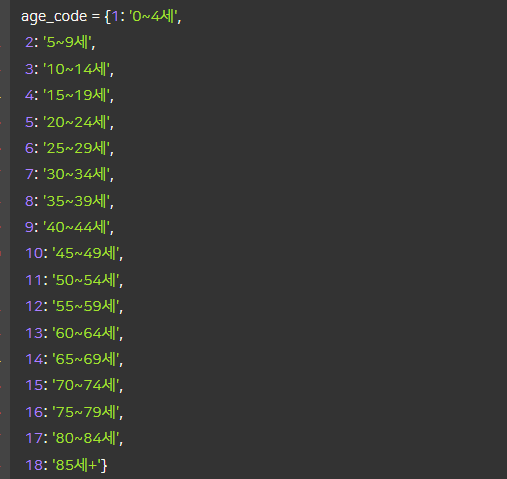

🔽 출력 예시

다음 이미지와 같은 결과가 나오며, 소숫점 표현 방식이 다르더라도 출력값이 같으면 상관 없습니다. 예를 들어 예시결과는 32인데 직접 구한 값이 32.0 로 보이더라도 상관이 없습니다.

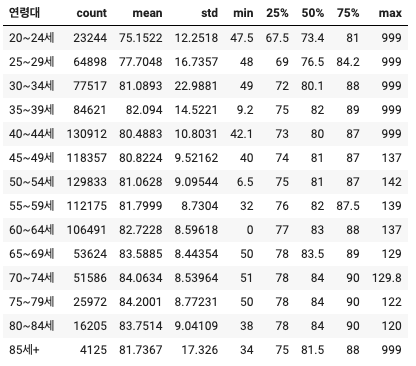



In [2]:
import pandas as pd
import numpy as np

# 주어진 딕셔너리 데이터
data = {
    '연령대코드(5세단위)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    '허리둘레': [65.2, 69.5, 72.3, 74.9, 77.7, 80.3, 82.5, 84.3, 85.6, 86.4, 86.8, 86.8, 86.5, 85.8, 84.8, 83.5, 81.9, 80.2]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 연령대 생성 함수
def create_age_group(code):
    return f"{code*5}~{code*5+4}"

# '연령대' 컬럼 생성
df['연령대'] = df['연령대코드(5세단위)'].apply(create_age_group)

# 기술통계 계산
stats = df.groupby('연령대')['허리둘레'].agg([
    ('빈도', 'count'),
    ('평균', 'mean'),
    ('표준편차', 'std'),
    ('최소값', 'min'),
    ('25%', lambda x: x.quantile(0.25)),
    ('50%', 'median'),
    ('75%', lambda x: x.quantile(0.75)),
    ('최대값', 'max')
])

# 결과 출력
print(stats)

       빈도    평균  표준편차   최소값   25%   50%   75%   최대값
연령대                                                
0~4     1  65.2   NaN  65.2  65.2  65.2  65.2  65.2
10~14   1  72.3   NaN  72.3  72.3  72.3  72.3  72.3
15~19   1  74.9   NaN  74.9  74.9  74.9  74.9  74.9
20~24   1  77.7   NaN  77.7  77.7  77.7  77.7  77.7
25~29   1  80.3   NaN  80.3  80.3  80.3  80.3  80.3
30~34   1  82.5   NaN  82.5  82.5  82.5  82.5  82.5
35~39   1  84.3   NaN  84.3  84.3  84.3  84.3  84.3
40~44   1  85.6   NaN  85.6  85.6  85.6  85.6  85.6
45~49   1  86.4   NaN  86.4  86.4  86.4  86.4  86.4
50~54   1  86.8   NaN  86.8  86.8  86.8  86.8  86.8
55~59   1  86.8   NaN  86.8  86.8  86.8  86.8  86.8
5~9     1  69.5   NaN  69.5  69.5  69.5  69.5  69.5
60~64   1  86.5   NaN  86.5  86.5  86.5  86.5  86.5
65~69   1  85.8   NaN  85.8  85.8  85.8  85.8  85.8
70~74   1  84.8   NaN  84.8  84.8  84.8  84.8  84.8
75~79   1  83.5   NaN  83.5  83.5  83.5  83.5  83.5
80~84   1  81.9   NaN  81.9  81.9  81.9  81.9  81.9
85~89   1  8

📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.


🔽 출력 예시

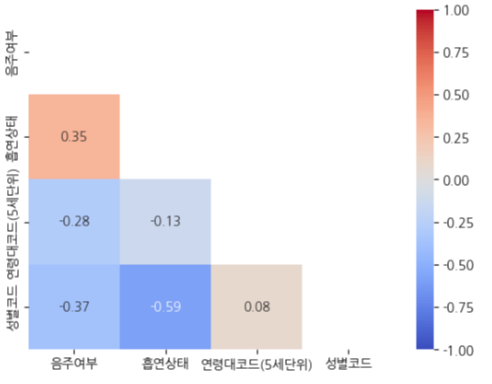

C:\Users\leejaesung\AppData\Local\Temp\ipykernel_2584\3153848194.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_data = df.applymap(lambda x: float(x) if x != '' else np.nan)


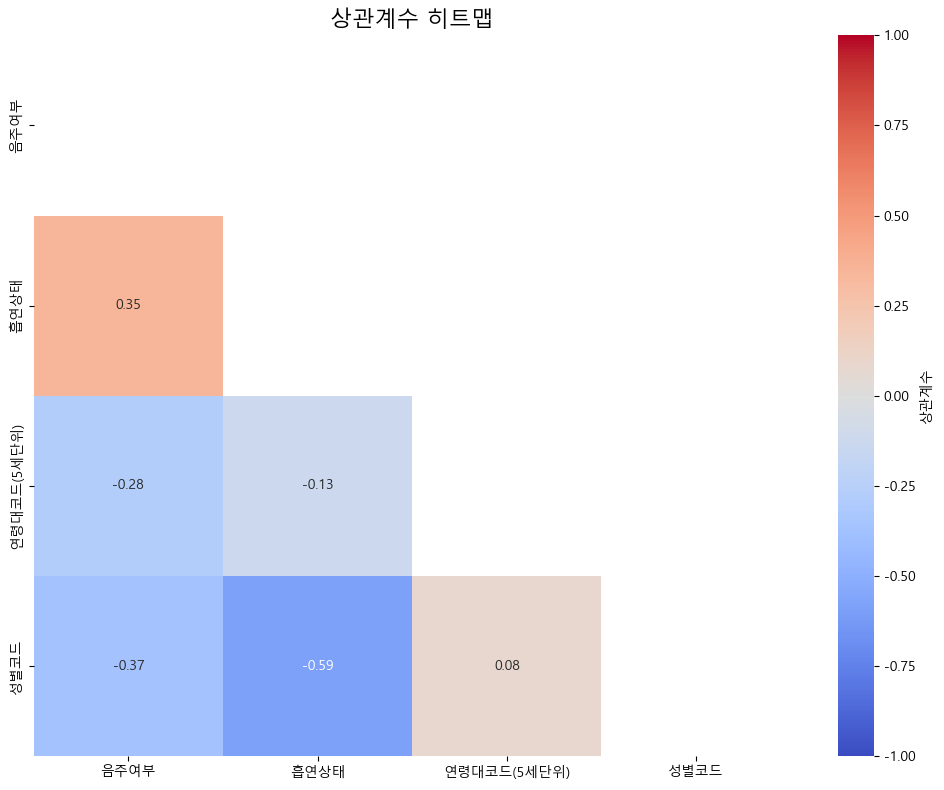

             음주여부  흡연상태 연령대코드(5세단위) 성별코드
음주여부                                    
흡연상태         0.35                       
연령대코드(5세단위) -0.28 -0.13                 
성별코드        -0.37 -0.59        0.08     


In [19]:
# 필요한 라이브러리 불러오기
import pandas as pd  # 데이터 처리를 위한 pandas
import numpy as np   # 수치 계산을 위한 numpy
import seaborn as sns  # 데이터 시각화를 위한 seaborn
import matplotlib.pyplot as plt  # 그래프 생성을 위한 matplotlib
from matplotlib import font_manager, rc  # 폰트 설정을 위한 모듈

# 한글 폰트 설정 (윈도우의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자의 경우 아래 줄의 주석을 제거하고 위 줄을 주석 처리하세요
# plt.rcParams['font.family'] = 'AppleGothic'

# 그래프에서 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

# 상관계수 행렬 데이터 생성 (하단 삼각형만)
# 빈 문자열('')은 히트맵에서 빈 칸으로 표시됩니다
data = [
    ['', '', '', ''],          # 첫 번째 행: 모두 빈 칸
    [0.35, '', '', ''],        # 두 번째 행: 첫 번째 열만 값 있음
    [-0.28, -0.13, '', ''],    # 세 번째 행: 첫 번째, 두 번째 열만 값 있음
    [-0.37, -0.59, 0.08, '']   # 네 번째 행: 첫 번째, 두 번째, 세 번째 열만 값 있음
]

# 열과 행의 이름 설정
columns = ['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

# 데이터프레임 생성
df = pd.DataFrame(data, columns=columns, index=columns)

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 숫자 데이터만 추출하여 새로운 데이터프레임 생성
# 빈 문자열은 NaN(Not a Number)으로 변환됩니다
numeric_data = df.applymap(lambda x: float(x) if x != '' else np.nan)

# 마스크 생성 (하단 삼각형만 표시하기 위함)
mask = np.tril(np.ones_like(numeric_data, dtype=bool), k=-1)
mask = ~mask  # 마스크 반전 (True를 False로, False를 True로)

# 히트맵 생성
sns.heatmap(numeric_data,  # 색상을 결정할 데이터
            annot=df,      # 각 셀에 표시할 텍스트
            mask=mask,     # 마스크 적용 (하단 삼각형만 표시)
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1, center=0,  # 색상 범위 설정
            fmt='',        # 셀 내부 텍스트 형식 (빈 문자열 그대로 표시)
            cbar_kws={'label': '상관계수'})  # 컬러바 레이블 설정

# 그래프 제목 설정
plt.title('상관계수 히트맵', fontsize=16)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 데이터프레임 출력 (콘솔에서 확인용)
print(df)

Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

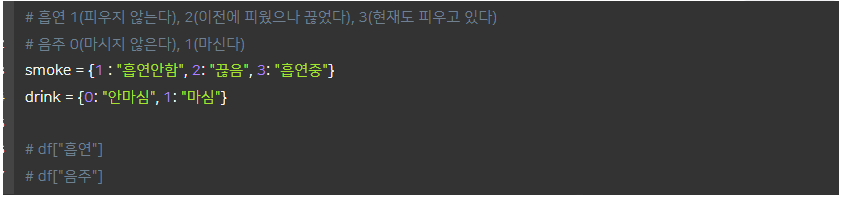

groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

🔽 출력 예시

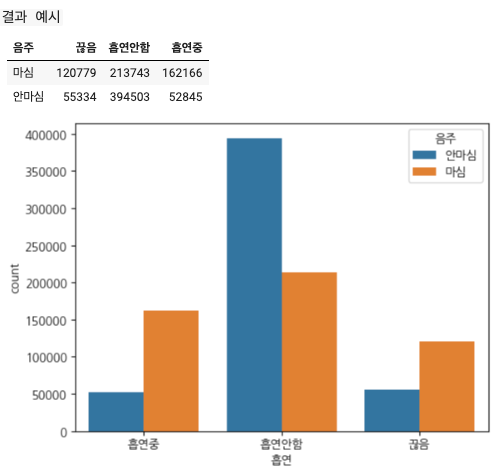

결과 예시
음주여부      마심     안마심
흡연상태                
끊음    120779   55334
흡연안함  213743  394503
흡연중   162166   52845



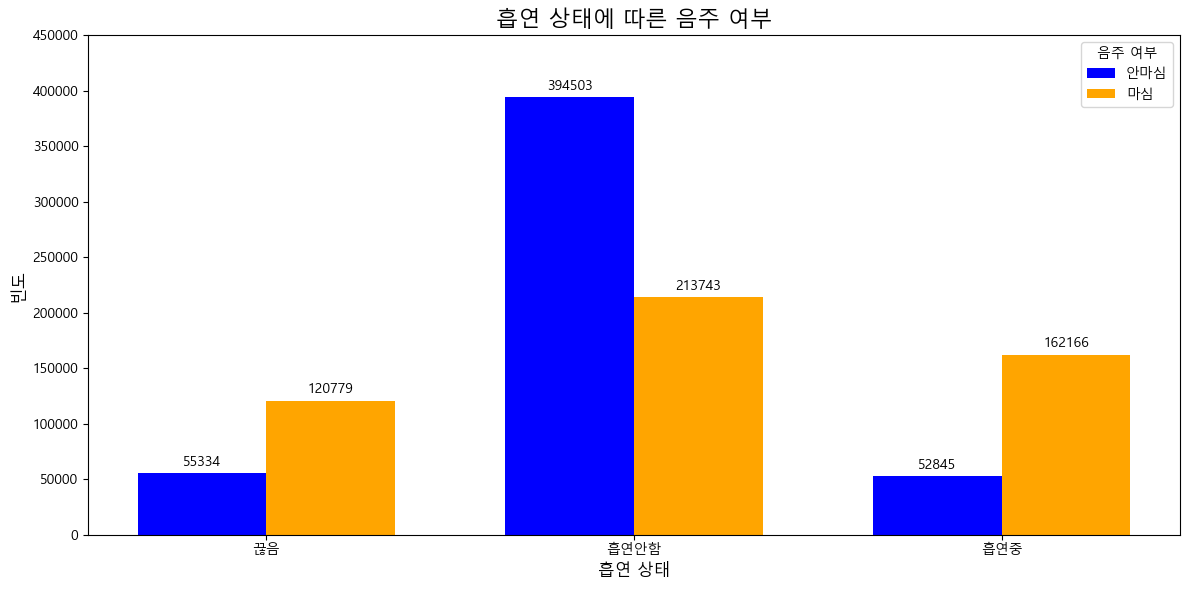

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 실제 데이터 생성
data = {
    '음주여부': ['마심'] * 120779 + ['마심'] * 213743 + ['마심'] * 162166 +
               ['안마심'] * 55334 + ['안마심'] * 394503 + ['안마심'] * 52845,
    '흡연상태': ['흡연중'] * 162166 + ['흡연안함'] * 213743 + ['끊음'] * 120779 +
               ['흡연중'] * 52845 + ['흡연안함'] * 394503 + ['끊음'] * 55334

}

df = pd.DataFrame(data)

# crosstab을 사용하여 교차 테이블 생성
cross_table = pd.crosstab(df['흡연상태'], df['음주여부'])

# 결과 출력 (표 형식)
print("결과 예시")
print(cross_table)
print()

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# x 좌표 설정
x = np.arange(len(cross_table.index))
width = 0.35

# 막대 그래프 생성
rects1 = ax.bar(x - width/2, cross_table['안마심'], width, label='안마심', color='blue')
rects2 = ax.bar(x + width/2, cross_table['마심'], width, label='마심', color='orange')

# 그래프 꾸미기
ax.set_ylabel('빈도', fontsize=12)
ax.set_xlabel('흡연 상태', fontsize=12)
ax.set_title('흡연 상태에 따른 음주 여부', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(cross_table.index)
ax.legend(title='음주 여부')

# y축 범위 설정
ax.set_ylim(0, 450000)

# 막대 위에 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# 그래프 표시
plt.tight_layout()
plt.show()

📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

🔽 출력 예시

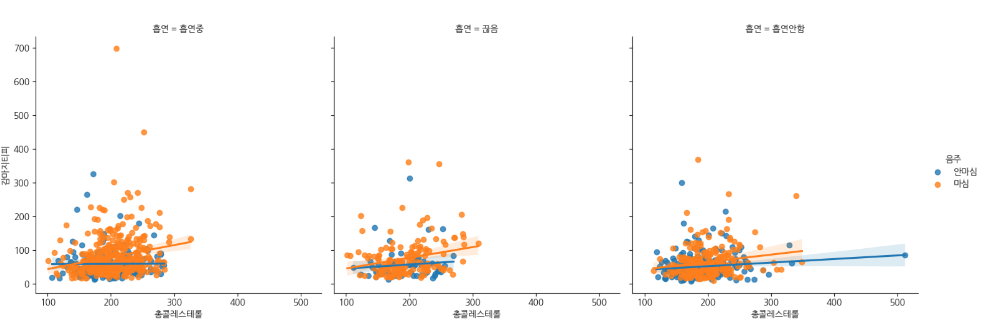

<Figure size 1000x600 with 0 Axes>

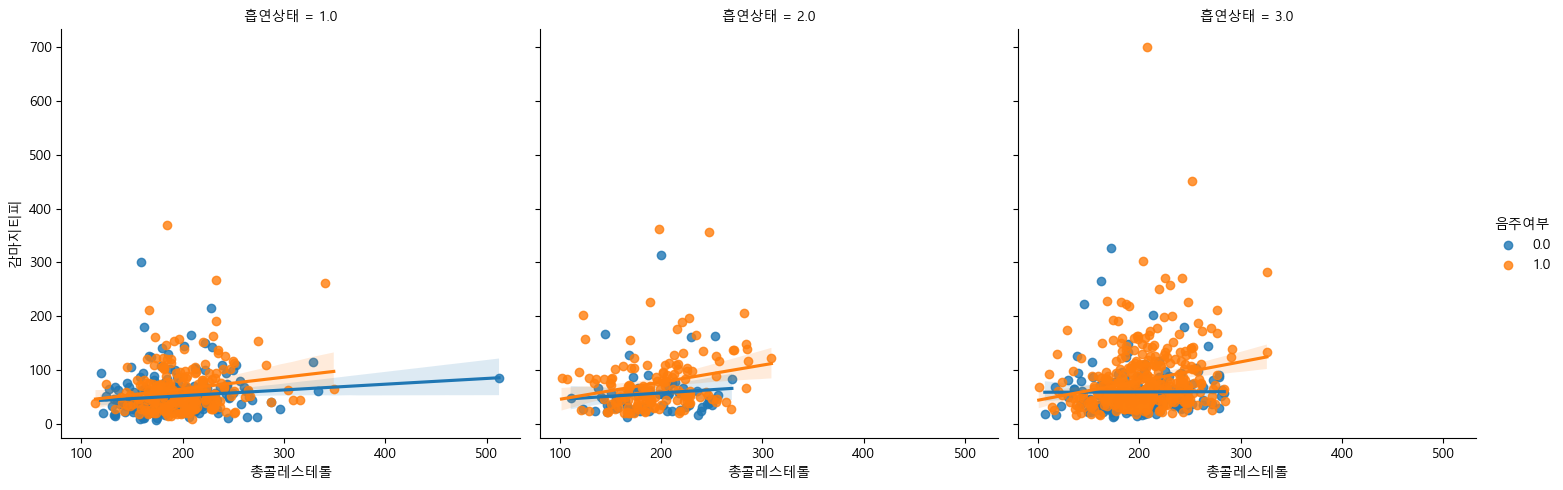

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")


    
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for weights 120 kg or more
filtered_df = df[df['체중(5Kg 단위)'] >= 120]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=filtered_df, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태')
# plt.title('음주 여부에 따른 총콜레스테롤과 감마지티피 산점도')
plt.xlabel('총콜레스테롤')
plt.ylabel('감마지티피')
plt.show()

📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.


🔽 출력예시

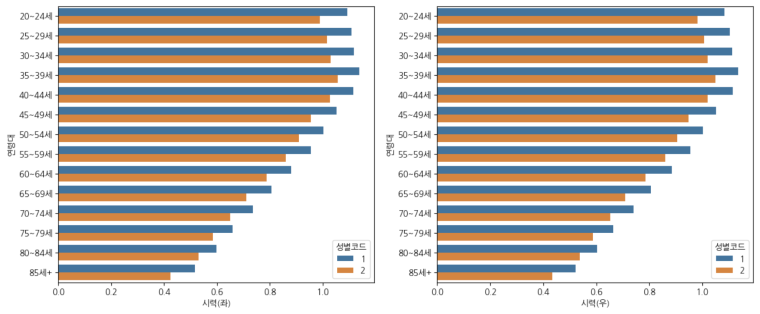

In [57]:
import matplotlib.pyplot as plt
print(df['시력(좌)'].unique())
eyes_filter_df = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)]
eyes_filter_df.head(5)
print(df.columns)

df['연령대'] = pd.cut(df['연령대코드(5세단위)'], 
                      bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], 
                      right=False, 
                      labels=['20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', 
                              '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85+'])

print(df.columns)

[1.  1.2 0.9 1.5 0.8 0.7 0.6 0.2 0.4 0.5 0.3 0.1 2.  9.9 nan 1.9 1.6 1.3
 1.7 1.1 2.5 1.4 1.8 2.2 2.1]
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')


In [61]:
eyes_filter_df['연령대'] = pd.cut(eyes_filter_df['연령대코드(5세단위)'], 
                                 bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], 
                                 right=False, 
                                 labels=['20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', 
                                         '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85+'])


left_eye_df = eyes_filter_df.groupby(['연령대','성별코드'])['시력(좌)'].mean()
left_eye_df



print(eyes_filter_df[['연령대', '성별코드', '시력(좌)']].head(10))
print(eyes_filter_df['시력(좌)'].dtype)


   연령대  성별코드  시력(좌)
0  NaN     1    1.0
1  NaN     2    1.2
2  NaN     1    1.0
3  NaN     2    0.9
4  NaN     1    1.5
5  NaN     1    1.2
6  NaN     1    1.0
7  NaN     2    0.8
8  NaN     1    0.7
9  NaN     1    1.0
float64


C:\Users\leejaesung\AppData\Local\Temp\ipykernel_2584\4081316540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyes_filter_df['연령대'] = pd.cut(eyes_filter_df['연령대코드(5세단위)'],
C:\Users\leejaesung\AppData\Local\Temp\ipykernel_2584\4081316540.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  left_eye_df = eyes_filter_df.groupby(['연령대','성별코드'])['시력(좌)'].mean()
